# Sintesi a posteriori {#sintesi-distr-post}

**Prerequisiti**

**Concetti e competenze chiave**

**Preparazione del Notebook**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import arviz as az

In [3]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = 'retina'

## Introduzione {.unnumbered}

In questo capitolo, concentriamo la nostra attenzione sulla sintesi dell'informazione racchiusa nella distribuzione a posteriori, la quale rappresenta il nostro livello di incertezza riguardo al parametro o ai parametri incogniti oggetto dell'inferenza.

## Riepilogo numerico

La distribuzione a posteriori contiene in sé tutte le informazioni disponibili sui potenziali valori del parametro. Nel caso di un parametro unidimensionale o bidimensionale, possiamo rappresentare la distribuzione a posteriori mediante un grafico $p(\theta \mid y)$.

Tuttavia, quando ci troviamo di fronte a vettori di parametri con più di due dimensioni, risulta vantaggioso eseguire una sintesi numerica della distribuzione a posteriori. Possiamo distinguere due forme di sintesi numerica della distribuzione a posteriori:

- Stima puntuale;
- Intervallo di credibilità.

## Stima puntuale

Nel contesto dell'inferenza bayesiana, il processo di stima del valore più credibile del parametro $\theta$ tramite la distribuzione a posteriori si avvale di tre statistiche: la moda, la mediana e la media, la cui scelta è guidata dalla forma della distribuzione a posteriori. Queste statistiche sono utilizzate per ottenere una stima puntuale della tendenza centrale della distribuzione a posteriori, che a sua volta fornisce il "valore più credibile" del parametro. Questo valore rappresenta la stima a cui attribuiamo il massimo grado di fiducia soggettiva, basandoci sui dati osservati e sulle nostre credenze a priori.

1. **Moda (Massimo a posteriori, MAP)**:
   La moda rappresenta il valore più probabile di un parametro, ovvero quello che massimizza la distribuzione a posteriori. Questo valore è noto come "massimo a posteriori" (MAP). La stima MAP prende origine dalla stima di massima verosimiglianza (MLE), che cerca il valore di $\theta$, denotato come $\hat{\theta}_{ML}$, che massimizza la funzione di verosimiglianza $L(\theta \mid y)$:

   $$ \hat{\theta}_{ML} = \arg \max_\theta L(\theta \mid y). $$

   Nell'inferenza bayesiana, $\theta$ è considerato una variabile casuale, e si specifica una distribuzione a priori su $\theta$ per riflettere l'incertezza sul suo valore. Integrando l'informazione a priori nella funzione di verosimiglianza, si ottiene la formula per la stima MAP:

   $$ \hat{\theta}_{MAP} = \arg \max_\theta L(\theta \mid y)p(\theta). $$

   Questa formula evidenzia che la stima MAP corrisponde al valore che massimizza la densità a posteriori di $\theta$ dati i dati osservati $y$, ovvero il valore che rappresenta la moda della distribuzione a posteriori.

   Sebbene il concetto di MAP sia intuitivo, presenta diversi problemi che ne limitano l'uso nella pratica.

   La prima difficoltà è di tipo computazionale: con i metodi MCMC comunemente utilizzati per stimare le distribuzioni a posteriori, è molto difficile individuare con precisione la posizione esatta del MAP nello spazio delle distribuzioni posteriori.

   Il secondo problema è legato all'uso dell'inferenza bayesiana in modelli complessi e in situazioni non asintotiche. In questi casi, la verosimiglianza o la distribuzione a posteriori possono avere forme irregolari o non normali. Se la distribuzione a posteriori è molto asimmetrica, il MAP potrebbe non rappresentare adeguatamente dove si concentra la maggior parte della probabilità. Di conseguenza, il MAP non sempre fornisce un'idea accurata del comportamento complessivo della distribuzione a posteriori.

2. **Media a posteriori**:
   La media a posteriori è il valore atteso del parametro $\theta$, calcolato sulla base della distribuzione a posteriori. In termini matematici, nel caso continuo, è espressa dalla formula:

   $$ E(\theta \mid y) = \int_{-\infty}^{\infty} \theta \, p(\theta \mid y) \, d\theta. $$

3. **Mediana**:
   La mediana è il valore del parametro per cui il 50% della massa di probabilità a posteriori si distribuisce equamente a sinistra e a destra. È una misura robusta della tendenza centrale, particolarmente utile in presenza di distribuzioni asimmetriche o multimodali, dove la moda potrebbe non fornire una stima accurata del valore più probabile del parametro.

Per valutare l'incertezza associata al parametro $\theta$, è utile calcolare la varianza a posteriori. Questa varianza è basata sulla tendenza centrale definita dalla media a posteriori, e la sua radice quadrata fornisce la deviazione standard a posteriori, che misura l'incertezza a posteriori relativa a $\theta$, espressa nelle stesse unità di misura dei dati. La formula per la varianza a posteriori è data da:

$$ 
V(\theta|y) = E[((\theta - E[(\theta|y)])^2 |y) = \int_{-\infty}^{\infty} (\theta - E[\theta | y])^2 p(\theta | y) d\theta = E[\theta^2 |y] - E[\theta|y]^2. 
$$

In sintesi, la media, la moda e la mediana a posteriori, insieme alla varianza a posteriori, forniscono una descrizione comprensiva del comportamento della distribuzione a posteriori di $\theta$, permettendoci di derivare stime puntuali e misurare l'incertezza associata a $\theta$ in modo informativo.

## Intervallo di credibilità

Nell'inferenza bayesiana, l'intervallo di credibilità è uno strumento utilizzato per definire un intervallo che contiene una determinata percentuale della massa della distribuzione a posteriori del parametro $\theta$. Questo intervallo riflette l'incertezza associata alla stima del parametro: un intervallo più ampio suggerisce una maggiore incertezza. Lo scopo principale dell'intervallo di credibilità è fornire una misura quantitativa dell'incertezza riguardante $\theta$.

A differenza degli intervalli di confidenza frequentisti, non esiste un unico intervallo di credibilità per un dato livello di confidenza $(1 - \alpha) \cdot 100\%$. In effetti, è possibile costruire un numero infinito di tali intervalli. Per questo motivo, è necessario stabilire criteri aggiuntivi per selezionare l'intervallo di credibilità più appropriato. Tra le opzioni più comuni ci sono l'intervallo di credibilità simmetrico e l'intervallo di massima densità posteriore (HPD).

1. **Intervallo di Credibilità Simmetrico**:
   Questo tipo di intervallo è centrato rispetto al punto di stima puntuale. Se $\hat{\theta}$ rappresenta la stima del parametro, l'intervallo simmetrico avrà la forma $(\hat{\theta} - a, \hat{\theta} + a)$, dove $a$ è un valore positivo scelto in modo tale che la massa totale inclusa sia pari a $(1 - \alpha)$. Più formalmente, un intervallo di credibilità simmetrico al livello $\alpha$ può essere espresso come:

   $$ I_{\alpha} = [q_{\alpha/2}, q_{1 - \alpha/2}], $$

   dove $q_z$ rappresenta il quantile $z$ della distribuzione a posteriori. Ad esempio, un intervallo di credibilità simmetrico al 94% sarà:

   $$ I_{0.06} = [q_{0.03}, q_{0.97}], $$

   dove il 3% della massa a posteriori si trova in ciascuna delle due code della distribuzione.

2. **Intervallo di Credibilità Più Stretto (Intervallo di Massima Densità Posteriore, HPD)**:
   L'intervallo di massima densità posteriore (HPD) è l'intervallo più stretto possibile che contiene il $(1 - \alpha) \cdot 100\%$ della massa a posteriori. A differenza dell'intervallo simmetrico, l'HPD include tutti i valori di $\theta$ che hanno la maggiore densità a posteriori. Per costruirlo, si disegna una linea orizzontale sulla distribuzione a posteriori e si regola l'altezza della linea in modo che l'area sotto la curva corrisponda a $(1 - \alpha)$. L'HPD risulta essere il più stretto tra tutti gli intervalli possibili per lo stesso livello di confidenza. Nel caso di una distribuzione a posteriori unimodale e simmetrica, l'HPD coincide con l'intervallo di credibilità simmetrico.

### Interpretazione

Il calcolo degli intervalli di credibilità, in particolare dell'intervallo di massima densità posteriore (HPD), richiede spesso l'uso di software statistici avanzati. Questo perché determinare manualmente tali intervalli può essere complicato, soprattutto nei modelli bayesiani con distribuzioni posteriori complesse o quando sono necessarie simulazioni numeriche per stimare la distribuzione a posteriori.

Un aspetto cruciale dell'inferenza bayesiana riguarda l'interpretazione dell'incertezza. Nel contesto frequentista, si considera il parametro, come ad esempio la media della popolazione $\mu$, come un valore fisso ma sconosciuto. L'inferenza frequentista si basa sull'immaginare un numero infinito di campioni ripetuti dalla popolazione. Per ogni campione, si può calcolare una media campionaria $\bar{x}$ e formare un intervallo di confidenza al $100(1-\alpha)\%$. L'interpretazione corretta in termini frequentisti è che, nel lungo periodo, il $100(1-\alpha)\%$ degli intervalli di confidenza costruiti con questo metodo conterrà il vero valore del parametro $\mu$. Tuttavia, per un singolo intervallo calcolato, la probabilità che contenga effettivamente $\mu$ è o 0 o 1, poiché $\mu$ è considerato un valore fisso.

Nel framework bayesiano, invece, il parametro è trattato come una variabile aleatoria con una distribuzione di probabilità. Campionando dalla distribuzione a posteriori dei parametri, possiamo ottenere quantili che ci permettono di calcolare direttamente la probabilità che un parametro rientri in un determinato intervallo. Ad esempio, un intervallo di credibilità al 95% indica che c'è una probabilità del 95% che il parametro sia contenuto all'interno di quell'intervallo, data l'evidenza osservata. Questa interpretazione differisce profondamente da quella frequentista e risulta più intuitiva, poiché riflette direttamente il grado di incertezza che abbiamo riguardo al parametro.

In sintesi, mentre l'intervallo di confidenza frequentista riguarda la ripetizione ipotetica del campionamento, l'intervallo di credibilità bayesiano fornisce una misura diretta dell'incertezza attuale sul valore di un parametro, basata sui dati osservati e sulle informazioni a priori. Questo approccio è spesso considerato più vicino al senso comune quando si tratta di interpretare la probabilità associata ai parametri.

## Verifica di ipotesi bayesiana

L'inferenza bayesiana può essere applicata anche nel contesto della verifica di ipotesi, in un approccio noto come <font color='orange'>verifica di ipotesi bayesiana</font>. In questo tipo di inferenza, l'obiettivo è valutare la plausibilità che un parametro $\theta$ assuma valori all'interno di un determinato intervallo. Ad esempio, possiamo voler sapere quanto è probabile che $\theta$ sia maggiore di 0.5 o che rientri in un intervallo specifico, come [0.5, 1.0].

In questo approccio, si calcola la <font color='orange'>probabilità a posteriori</font> che $\theta$ si trovi all'interno dell'intervallo di interesse. Questa probabilità viene ottenuta integrando la distribuzione a posteriori su tale intervallo. Quindi, invece di rifiutare o accettare un'ipotesi come nel test di ipotesi frequentista, la verifica di ipotesi bayesiana fornisce una misura diretta della probabilità che un parametro rientri in un intervallo specifico, dato l'evidenza osservata e le informazioni a priori.

In altre parole, questo approccio consente di quantificare la nostra incertezza rispetto all'affermazione che $\theta$ rientri in un certo intervallo, fornendo una probabilità che rappresenta direttamente la plausibilità di quell'ipotesi.

::: {#exm-}

Per comprendere meglio attraverso un esempio pratico, esaminiamo i dati relativi ai punteggi del BDI-II (Beck Depression Inventory - Second Edition) di 30 soggetti clinici, come riportato nello studio condotto da @zetsche_2019future. Il BDI-II è un questionario utilizzato per valutare la gravità dei sintomi depressivi.

In [3]:
bdi = np.array([
    26,
    35,
    30,
    25,
    44,
    30,
    33,
    43,
    22,
    43,
    24,
    19,
    39,
    31,
    25,
    28,
    35,
    30,
    26,
    31,
    41,
    36,
    26,
    35,
    33,
    28,
    27,
    34,
    27,
    22,
])
print(*bdi)

26 35 30 25 44 30 33 43 22 43 24 19 39 31 25 28 35 30 26 31 41 36 26 35 33 28 27 34 27 22


Un valore BDI-II $\geq 30$ indica la presenza di un livello grave di depressione. Nel campione clinico di {cite:t}`zetsche_2019future`, 17 pazienti su 30 manifestano un livello grave di depressione.

In [4]:
np.sum(bdi >= 30)

17

Supponiamo di volere stimare la distribuzione a posteriori della probabilità $\theta$ di depressione grave nei pazienti clinici, così come viene misurata dal test BDI-II, imponendo su $\theta$ una distribuzione a priori $Beta(8, 2)$. 

Poiché i dati possono essere concepiti come una sequenza di prove Bernoulliane indipendenti, laddove la presenza di depressione grave viene concepita come un "successo", la verosimiglianza sarà Binomiale con paramentri $n$ = 30 e $y$ = 17. 

Avendo scelto, quale distribuzione a priori, una $Beta(8, 2)$, la distribuzione a posteriori di $\theta$ sarà una $Beta(8 + 17, 2 + 30 - 17)$:

$$
f(\theta \mid y = 17) = \frac{\Gamma(25 + 15)}{\Gamma(25)\Gamma(15)}\theta^{25-1} (1-\theta)^{15-1} \;\; \text{ for } \theta \in [0,1] \; .
$$ (eq-post-beta-25-15)


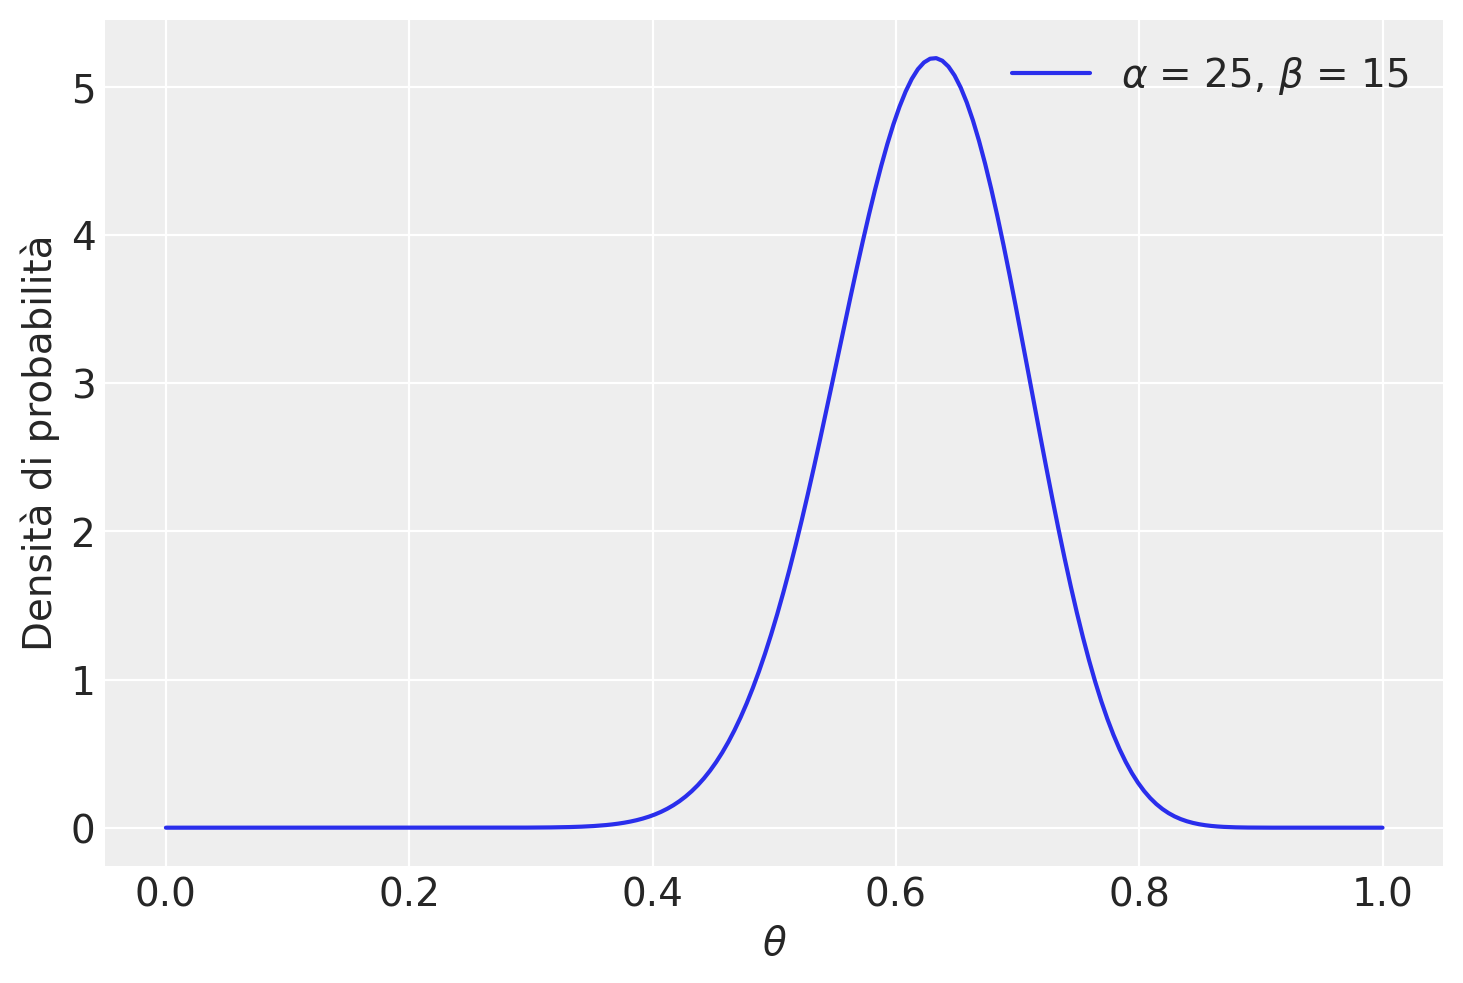

In [5]:
theta = np.linspace(0, 1, 200)
alpha = 25
beta = 15
pdf = stats.beta.pdf(theta, alpha, beta)
plt.plot(theta, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(alpha, beta))
plt.xlabel(r"$\theta$", fontsize=14)
plt.ylabel("Densità di probabilità", fontsize=14)
plt.legend(loc=1)
plt.show()

Vediamo ora come ottenere delle stime puntuali da tale distribuzione a posteriori. 

per il presente esempio, la media della distribuzione a posteriori di $\theta$ è

$$
\mathbb{E}(\pi \mid y = 17) = \frac{\alpha}{\alpha + \beta} = \frac{25}{25+15} = 0.625.
$$

Una stima del massimo della probabilità a posteriori, o brevemente massimo a posteriori, MAP (da *maximum a posteriori probability*), è la moda della distribuzione a posteriori. Nel caso presente, abbiamo

$$
Mo(\pi \mid y = 17) = \frac{\alpha-1}{\alpha + \beta-2} = \frac{25-1}{25+15-2} = 0.6316.
$$

La mediana si ottiene con la funzione `beta.ppf()`:

In [6]:
stats.beta.ppf(0.5, alpha, beta)

0.6271031100419254

L'intervallo di credibilità simmetrico al 94% è dato dalla chiamata a `beta.ppf()`.

In [7]:
[stats.beta.ppf(0.03, alpha, beta), stats.beta.ppf(0.97, alpha, beta)]

[0.4781025861696672, 0.7612890799836668]

Il calcolo precedente evidenzia l'interpretazione intuitiva dell'intervallo di credibilità. Tale intervallo, infatti, può essere interpretato nel modo seguente: possiamo attribuire una certezza soggettiva del 94% all'evento che $\theta$ assuma un valore compreso tra 0.478 e 0.761. Il valore di 0.94 corrisponde infatti all'area sottesa dalla distribuzione a posteriori nell'intervallo $$0.478, 0.761$$.

$$
P(\theta \in (0.478, 0.761) \mid Y = 17) = \int_{0.478}^{0.761} f(\theta \mid y=17) d\theta = 0.94.
$$

In [8]:
betacdf = stats.beta(alpha, beta).cdf
betacdf(0.7612890799836668) - betacdf(0.4781025861696672)

0.9400000000000001

Possiamo costruire vari intervalli di credibilità simmetrici. Ad esempio, l'intervallo di credibilità compreso tra il 25-esimo e il 75-esimo percentile:

In [9]:
[stats.beta.ppf(0.25, alpha, beta), stats.beta.ppf(0.75, alpha, beta)]

[0.5743877928498646, 0.6778673380880944]

In questo secondo caso, possiamo affermare con una certezza soggettiva del 50% che la probabilità di depressione grave tra i pazienti clinici si situa tra 0.57 e 0.68.

Non esiste un livello "giusto" di credibilità soggettiva. I ricercatori adottano livelli differenti, come il 50%, l'80% o il 94%, a seconda del contesto dell'analisi statistica. Ogni intervallo offre una prospettiva unica sulla nostra comprensione della distribuzione a posteriori del parametro d'interesse.

Non sempre è appropriato presentare un intervallo di credibilità con le stesse code. Quando la distribuzione a posteriori è marcatamente asimmetrica, risulta più adeguato fornire l'intervallo di credibilità più stretto (o Intervallo di Massima Densità Posteriore, HPD). L'intervallo HPD è più facilmente calcolabile quando si approssima la distribuzione a posteriori con il metodo MCMC.

Passiamo ora alla verifica di ipotesi bayesiana. Supponiamo che la nostra ipotesi sia: $\theta >$ 0.5. La credibilità soggettiva dell'evento $\theta > 0.5$ può essere ottenuta calcolando il seguente integrale:

$$
f(\theta > 0.5 \; \mid \; y = 17) = \int_{0.5}^{1}f(\theta \mid y=17)d\theta \;,
$$

dove $f(\cdot)$ è la distribuzione Beta(25, 15). 

È facile trovare questo valore con Python.

In [10]:
# Parametri della distribuzione Beta
alpha = 25
beta = 15

# Calcoliamo la probabilità P(theta < 0.5) utilizzando la funzione cdf 
probability = stats.beta.cdf(0.5, alpha, beta)

# La probabilità P(theta < 0.5) è data da 1 - P(theta > 0.5)
probability_less_than_0_5 = 1 - probability

print(f"La probabilità P(theta < 0.5) per una Beta(25, 15) è: {probability_less_than_0_5:.4f}")

La probabilità P(theta < 0.5) per una Beta(25, 15) è: 0.9459


:::

## Sintesi della distribuzione a posteriori: questioni multivariate

Quando si affronta un'analisi bayesiana con più parametri, la complessità aumenta. Le principali difficoltà riguardano le interazioni tra i parametri e il modo in cui queste influenzano le distribuzioni marginali. Questi fattori possono complicare notevolmente la sintesi della distribuzione a posteriori e, se non considerati attentamente, possono portare a interpretazioni errate.

### Correlazioni nascoste e distribuzioni marginali

Un problema comune nelle analisi con più parametri è rappresentato dalle **correlazioni tra i parametri**. Le distribuzioni marginali a posteriori, spesso riportate nei riassunti statistici, possono essere **molto fuorvianti** se considerate isolatamente. Quando i parametri sono fortemente correlati, le distribuzioni marginali possono apparire piatte o poco informative, inducendo a pensare che non ci sia molta informazione nella verosimiglianza.

Tuttavia, le correlazioni tra parametri possono restringere notevolmente lo spazio delle combinazioni plausibili, escludendo vaste aree dello spazio dei parametri. Questo significa che, nonostante le marginali possano sembrare non informative, l'analisi congiunta dei parametri può rivelare una struttura sottostante che riduce l'incertezza su specifiche combinazioni. Pertanto, è essenziale esaminare le correlazioni congiunte tra i parametri per ottenere una visione più completa dell'incertezza.

Con un numero maggiore di parametri, anche i grafici di correlazione bidimensionali possono diventare limitati, poiché potrebbero esistere correlazioni di ordine superiore che non emergono in rappresentazioni a due dimensioni.

### Correlazioni non lineari

Un'altra difficoltà significativa riguarda le **correlazioni non lineari** tra i parametri. Quando queste correlazioni sono presenti, il massimo delle distribuzioni marginali non coincide necessariamente con il massimo della distribuzione congiunta. Per esempio, se due parametri presentano una correlazione complessa, come una forma a "banana", il massimo delle distribuzioni marginali potrebbe trovarsi in una posizione diversa rispetto al massimo globale della distribuzione congiunta.

Questo fenomeno rende più difficile sintetizzare correttamente la distribuzione a posteriori. In tali casi, la stima del **massimo a posteriori (MAP)** o altri riassunti, come gli **intervalli di credibilità (CI)** o gli **intervalli di massima densità a posteriori (HPD)**, calcolati sulle marginali, potrebbero essere fuorvianti. Quando la distribuzione a posteriori è asimmetrica nello spazio multivariato, le distribuzioni marginali non catturano adeguatamente le relazioni tra i parametri. Questa è una fonte comune di confusione, poiché si tende a sottovalutare l'importanza della struttura multivariata nella distribuzione a posteriori.

### Strategie per affrontare queste sfide

1. **Confronto tra distribuzioni predittive**:
   - Confrontare la distribuzione predittiva a priori con quella a posteriori offre una visione più completa della riduzione dell'incertezza.
   - Questo approccio è particolarmente utile in presenza di parametri multipli e correlazioni complesse, poiché la distribuzione predittiva a posteriori incorpora le interazioni tra i parametri, fornendo una rappresentazione più accurata della plausibilità dei diversi valori parametrici.

2. **Analisi congiunta**:
   - Esaminare le distribuzioni congiunte dei parametri, oltre alle distribuzioni marginali.
   - Utilizzare grafici di dispersione bivariati o multivariati per visualizzare le relazioni tra i parametri.
   - Tecniche avanzate di visualizzazione, come i **pair plots** o le **heatmap**, possono essere utili per esplorare relazioni in spazi ad alta dimensionalità.

3. **Misure di dipendenza**:
   - Utilizzare misure di dipendenza non lineare, come la **correlazione di Spearman** o l'**informazione mutua**, che possono catturare relazioni complesse che le misure lineari tradizionali potrebbero non rilevare.

4. **Analisi di sensibilità**:
   - Condurre un'analisi di sensibilità per valutare come i cambiamenti in un parametro influenzano gli altri parametri e le previsioni del modello. Questo permette di capire meglio le relazioni tra i parametri e il loro impatto sulle inferenze.

5. **Tecniche di riduzione della dimensionalità**:
   - Quando ci sono molti parametri, l'uso di metodi come l'**analisi delle componenti principali (PCA)** o il **t-SNE** può aiutare a identificare strutture latenti e ridurre la complessità del problema, facilitando l'interpretazione dei risultati.

In sintesi, l'analisi multivariata in un contesto bayesiano richiede particolare attenzione nella sintesi delle distribuzioni a posteriori. Le distribuzioni marginali possono fornire informazioni utili, ma spesso nascondono importanti correlazioni e strutture di dipendenza tra i parametri. Un'analisi completa dovrebbe combinare l'esame delle marginali con una valutazione attenta delle relazioni congiunte tra i parametri, utilizzando tecniche di visualizzazione e misure di dipendenza adeguate. Questo approccio integrato permette di comprendere più a fondo la distribuzione a posteriori e di trarre inferenze più robuste e accurate.

## Riflessioni Conclusive

In conclusione, la distribuzione a posteriori rappresenta la nostra conoscenza aggiornata sui parametri sconosciuti. L'impiego delle statistiche descrittive e l'analisi degli intervalli di credibilità contribuiscono a tracciare un quadro completo della distribuzione a posteriori e delle nostre inferenze riguardo al parametro di interesse.

Le stime puntuali, ottenute attraverso statistiche descrittive come media, mediana o moda a posteriori, offrono una singola valutazione numerica del parametro ignoto. Gli intervalli di credibilità forniscono un intervallo di valori all'interno del quale si ritiene, con un certo grado di probabilità soggettiva, che il parametro incognito possa rientrare. Questi intervalli quantificano l'incertezza associata al parametro e consentono di esprimere il livello di fiducia soggettiva riguardo ai possibili valori del parametro dopo l'analisi dei dati. Abbiamo inoltre esaminato il concetto di test di ipotesi bayesiano, il quale può essere condotto agevolmente calcolando l'area appropriata sotto la distribuzione a posteriori, in accordo con l'ipotesi in questione.

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [12]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Thu Mar 28 2024

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

scipy     : 1.12.0
numpy     : 1.26.4
arviz     : 0.17.1
sys       : 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:51:20) [Clang 16.0.6 ]
matplotlib: 3.8.3

Watermark: 2.4.3
